# House Prices Prediction

In [1]:
#Importing required packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline


In [2]:
#Dataset import - for both Training and Testing

train_predictors = pd.read_csv('train.csv')
test_predictors = pd.read_csv('test.csv')

In [3]:
train_predictors.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_predictors.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train_predictors.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
#Correlations
correlations = train_predictors.corr()
correlations = correlations["SalePrice"].sort_values(ascending = False)
correlations

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [7]:
#Dropping the target variable from Train 
train_target = train_predictors['SalePrice']
# train_predictors = train_predictors.drop(['SalePrice'], axis = 1)

In [8]:
train_ID = train_predictors['Id']
test_ID = test_predictors['Id']

In [9]:
#Drop the Id column from both Train and Test Dataset
train_predictors.drop(['Id'], axis = 1, inplace = True)
test_predictors.drop(['Id'], axis = 1, inplace = True)

In [10]:
train_predictors.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Preprocessing

Text(0, 0.5, 'SalePrice')

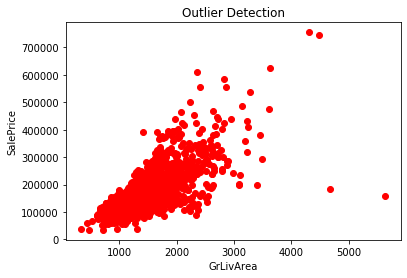

In [11]:
plt.scatter(train_predictors.GrLivArea, train_predictors.SalePrice, c = 'red')
plt.title("Outlier Detection")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")

In [12]:
train_predictors = train_predictors[train_predictors.GrLivArea < 4000]

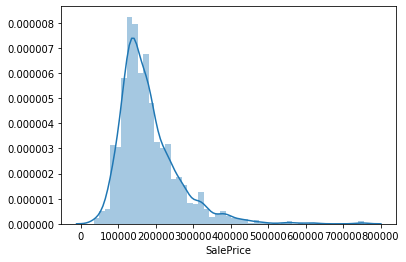

In [13]:
sns.distplot(train_target)

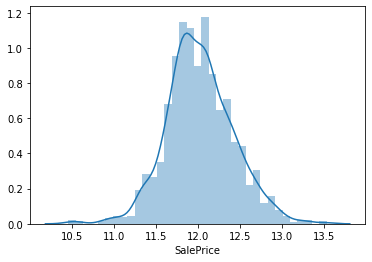

In [14]:
# Whenever there is right skewed data, take a log of the sample.
# What if there is a left skewed data?

sns.distplot(np.log(train_target))

In [15]:
train_target_final = np.log(train_target) 

In [19]:
# Missing value treatement

train_predictors_missing = pd.isna(train_predictors).sum()
test_missing = pd.isna(test_predictors).sum()

missing = pd.concat([train_predictors_missing, test_missing], axis = 1, keys = ["Train", "Test"])

missing_values = missing[missing.sum(axis = 1) > 0]
missing_values

,Train,Test
Alley,1365,1352.0
BsmtCond,37,45.0
BsmtExposure,38,44.0
BsmtFinSF1,0,1.0
BsmtFinSF2,0,1.0
BsmtFinType1,37,42.0
BsmtFinType2,38,42.0
BsmtFullBath,0,2.0
BsmtHalfBath,0,2.0
BsmtQual,37,44.0


In [20]:
meaningful_missing = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", 
                    "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", 
                    "GarageCond", "Fence","PoolQC", "MiscFeature"]

In [21]:
for i in meaningful_missing:
    train_predictors[i].fillna("None", inplace = True)
    test_predictors[i].fillna("None", inplace = True)

In [22]:
train_predictors.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [24]:
#Actual Missing Value identification (Where there is no explanation of the NA values)

train_predictors_missing1 = pd.isna(train_predictors).sum()
test_missing1 = pd.isna(test_predictors).sum()

missing1 = pd.concat([train_predictors_missing1, test_missing1], axis = 1, keys = ["Train", "Test"])

missing_values1 = missing1[missing1.sum(axis = 1) > 0]
missing_values1

,Train,Test
BsmtFinSF1,0,1.0
BsmtFinSF2,0,1.0
BsmtFullBath,0,2.0
BsmtHalfBath,0,2.0
BsmtUnfSF,0,1.0
Electrical,1,0.0
Exterior1st,0,1.0
Exterior2nd,0,1.0
Functional,0,2.0
GarageArea,0,1.0


In [25]:
#Since the variable LotFrontage has high missing value, hence let's remove it.

train_predictors.drop("LotFrontage", axis = 1, inplace = True)
test_predictors.drop("LotFrontage", axis = 1, inplace = True)

In [26]:
train_predictors.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'Ope

In [27]:
train_predictors.shape

(1456, 79)

In [28]:
test_predictors.shape

(1459, 78)

## Separating Numerical and Categorical Columns

In [31]:
numeric_features_train = train_predictors.select_dtypes(include = [np.number])
numeric_features_test = test_predictors.select_dtypes(include = [np.number])

In [33]:
numeric_features_train.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [34]:
numeric_features_test.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [35]:
train_predictors = train_predictors.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

test_predictors = test_predictors.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

In [36]:
numeric_features_train = train_predictors.select_dtypes(include = [np.number])
numeric_features_test = test_predictors.select_dtypes(include = [np.number])

In [38]:
numeric_features_test.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold'],
      dtype='object')

In [39]:
categorical_features_train = train_predictors.select_dtypes(exclude = [np.number])
categorical_features_test = test_predictors.select_dtypes(exclude = [np.number])

In [40]:
categorical_features_train.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [41]:
# Missing value treatement
numeric_features_train.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'SalePrice'],
      dtype='object')

In [42]:
numeric_features_train.fillna(numeric_features_train.mean(), inplace = True)
numeric_features_test.fillna(numeric_features_test.mean(), inplace = True)

In [43]:
numeric_features_train

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,8450,7,5,2003,2003,196.0,706,0,150,856,...,548,0,61,0,0,0,0,0,2008,208500
1,9600,6,8,1976,1976,0.0,978,0,284,1262,...,460,298,0,0,0,0,0,0,2007,181500
2,11250,7,5,2001,2002,162.0,486,0,434,920,...,608,0,42,0,0,0,0,0,2008,223500
3,9550,7,5,1915,1970,0.0,216,0,540,756,...,642,0,35,272,0,0,0,0,2006,140000
4,14260,8,5,2000,2000,350.0,655,0,490,1145,...,836,192,84,0,0,0,0,0,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,1999,2000,0.0,0,0,953,953,...,460,0,40,0,0,0,0,0,2007,175000
1456,13175,6,6,1978,1988,119.0,790,163,589,1542,...,500,349,0,0,0,0,0,0,2010,210000
1457,9042,7,9,1941,2006,0.0,275,0,877,1152,...,252,0,60,0,0,0,0,2500,2010,266500
1458,9717,5,6,1950,1996,0.0,49,1029,0,1078,...,240,366,0,112,0,0,0,0,2010,142125


In [44]:
# Categorical Features Missing Value Treatement

categorical_features_train.fillna(categorical_features_train.mode(), inplace = True)
categorical_features_test.fillna(categorical_features_test.mode(), inplace = True)

In [45]:
categorical_features_train

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition
0,SC60,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,RFn,TA,TA,Y,None,None,None,Feb,WD,Normal
1,SC20,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,RFn,TA,TA,Y,None,None,None,May,WD,Normal
2,SC60,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,RFn,TA,TA,Y,None,None,None,Sep,WD,Normal
3,SC70,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Unf,TA,TA,Y,None,None,None,Feb,WD,Abnorml
4,SC60,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,RFn,TA,TA,Y,None,None,None,Dec,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,SC60,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,RFn,TA,TA,Y,None,None,None,Aug,WD,Normal
1456,SC20,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,Unf,TA,TA,Y,None,MnPrv,None,Feb,WD,Normal
1457,SC70,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,RFn,TA,TA,Y,None,GdPrv,Shed,May,WD,Normal
1458,SC20,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Unf,TA,TA,Y,None,None,None,Apr,WD,Normal


In [46]:
# Combine Cat variables of both Train and Test

categorical_features_traintest = pd.concat([categorical_features_train, categorical_features_test])

In [47]:
categorical_features_traintest.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [49]:
#pip install --upgrade category_encoders

  ERROR: Could not find a version that satisfies the requirement categorical_encoders (from versions: none)
ERROR: No matching distribution found for categorical_encoders
Note: you may need to restart the kernel to use updated packages.


In [50]:
import category_encoders as ce
encoder = ce.BackwardDifferenceEncoder(cols = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition'])

categorical_encoded = encoder.fit_transform(categorical_features_traintest)

In [51]:
categorical_encoded

,intercept,MSSubClass_0,MSSubClass_1,MSSubClass_2,MSSubClass_3,MSSubClass_4,MSSubClass_5,MSSubClass_6,MSSubClass_7,MSSubClass_8,...,SaleType_4,SaleType_5,SaleType_6,SaleType_7,SaleType_8,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4
0,1,-0.9375,-0.875,-0.8125,-0.75,-0.6875,-0.625,-0.5625,-0.5,-0.4375,...,-0.5,-0.4,-0.3,-0.2,-0.1,-0.833333,-0.666667,-0.5,-0.333333,-0.166667
1,1,0.0625,-0.875,-0.8125,-0.75,-0.6875,-0.625,-0.5625,-0.5,-0.4375,...,-0.5,-0.4,-0.3,-0.2,-0.1,-0.833333,-0.666667,-0.5,-0.333333,-0.166667
2,1,-0.9375,-0.875,-0.8125,-0.75,-0.6875,-0.625,-0.5625,-0.5,-0.4375,...,-0.5,-0.4,-0.3,-0.2,-0.1,-0.833333,-0.666667,-0.5,-0.333333,-0.166667
3,1,0.0625,0.125,-0.8125,-0.75,-0.6875,-0.625,-0.5625,-0.5,-0.4375,...,-0.5,-0.4,-0.3,-0.2,-0.1,0.166667,-0.666667,-0.5,-0.333333,-0.166667
4,1,-0.9375,-0.875,-0.8125,-0.75,-0.6875,-0.625,-0.5625,-0.5,-0.4375,...,-0.5,-0.4,-0.3,-0.2,-0.1,-0.833333,-0.666667,-0.5,-0.333333,-0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1,0.0625,0.125,0.1875,0.25,0.3125,0.375,0.4375,0.5,0.5625,...,-0.5,-0.4,-0.3,-0.2,-0.1,-0.833333,-0.666667,-0.5,-0.333333,-0.166667
1455,1,0.0625,0.125,0.1875,0.25,0.3125,0.375,0.4375,0.5,0.5625,...,-0.5,-0.4,-0.3,-0.2,-0.1,0.166667,-0.666667,-0.5,-0.333333,-0.166667
1456,1,0.0625,-0.875,-0.8125,-0.75,-0.6875,-0.625,-0.5625,-0.5,-0.4375,...,-0.5,-0.4,-0.3,-0.2,-0.1,0.166667,-0.666667,-0.5,-0.333333,-0.166667
1457,1,0.0625,0.125,0.1875,0.25,0.3125,0.375,0.4375,0.5,0.5625,...,-0.5,-0.4,-0.3,-0.2,-0.1,-0.833333,-0.666667,-0.5,-0.333333,-0.166667


In [55]:
num_train = categorical_features_train.shape[0]

In [56]:
#Separate Train and Test Categorical Variables

categorical_train_encoded = categorical_encoded[:num_train]
categorical_test_encoded = categorical_encoded[num_train:]

In [57]:
train = pd.concat([numeric_features_train,categorical_train_encoded],axis = 1)
test = pd.concat([numeric_features_test, categorical_test_encoded], axis = 1)

In [61]:
train.shape

(1456, 292)

In [62]:
train = train.drop(['SalePrice'], axis = 1)

In [63]:
test.shape

(1459, 291)

In [65]:
train.shape

(1456, 291)

In [66]:
train_target_final

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

## Modelling

In [ ]:
#To do: Fix the rows of train_target_final which currently is more than train data rows.